In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_parquet("../data/inference/Bogor_2022-09-05-06-00-00_2022-09-05-09-00-00.parquet.gzip")
df

,street,time,median_length,median_delay,median_speed_kmh,median_regular_speed,median_delay_seconds,rain_intensity,holiday_gap,level
0,Binamarga,2022-09-05 06:00:00,944.073021,47.688814,21.158976,22.070456,11.258950,0.0,-1,0
1,N9 KH Soleh Iskandar,2022-09-05 06:00:00,1366.923769,90.454060,34.580495,23.939861,76.192464,0.0,-1,0
2,Pemuda,2022-09-05 06:00:00,1571.778701,30.429110,29.435582,32.308384,10.589722,0.0,-1,0
3,Pangeran Asogiri,2022-09-05 06:00:00,1119.573224,42.858462,17.888612,19.007083,13.017546,0.0,-1,0
4,N9 Ir Haji Juanda,2022-09-05 06:00:00,1830.376447,69.814455,30.579794,27.521334,66.597883,0.0,-1,0
...,...,...,...,...,...,...,...,...,...,...
179,Jenderal Ahmad Yani,2022-09-05 09:00:00,1112.839832,82.561392,20.396286,21.083128,70.323468,0.0,-1,1
180,N9 Jalan Raya Pajajaran,2022-09-05 09:00:00,1335.104995,104.065934,20.905643,22.647561,88.628959,0.0,-1,1
181,Siliwangi,2022-09-05 09:00:00,1370.802413,60.524155,22.886403,26.387502,13.854813,0.0,-1,0
182,RE Abdullah,2022-09-05 09:00:00,843.471092,61.329310,14.726772,22.268389,10.890829,0.0,-1,1


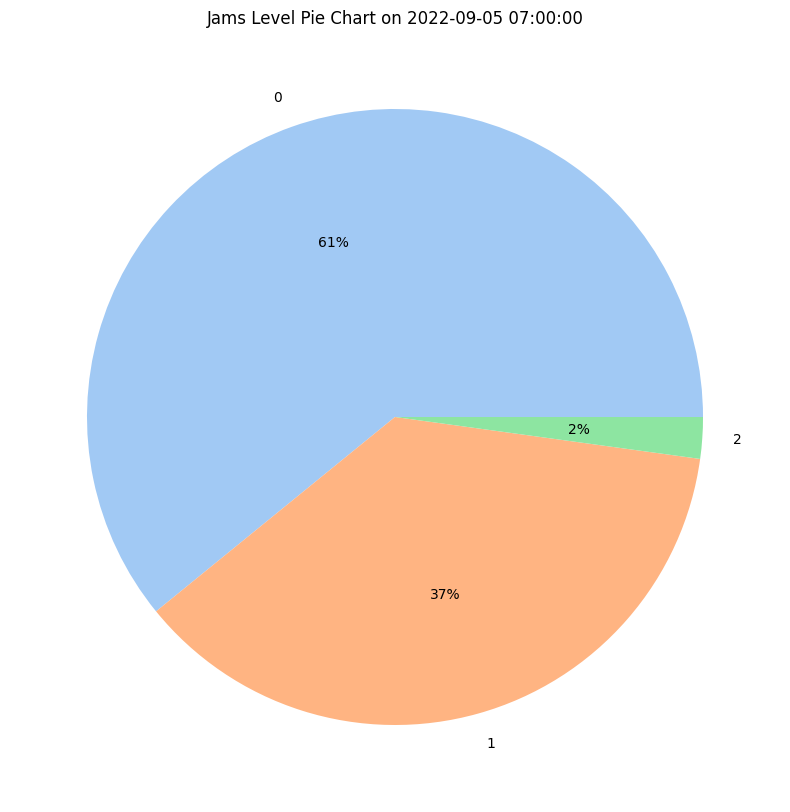

In [12]:
timestamp = '2022-09-05 07:00:00'

used_df = df[df['time'] == timestamp]

count_data = used_df['level'].value_counts()
colors = sns.color_palette('pastel')[0:len(set(used_df['level']))]

plt.figure(figsize=(10,10))
plt.title('Jams Level Pie Chart on {}'.format(timestamp))
plt.pie(count_data.values, labels=count_data.index, colors=colors, autopct='%.0f%%')
plt.show()

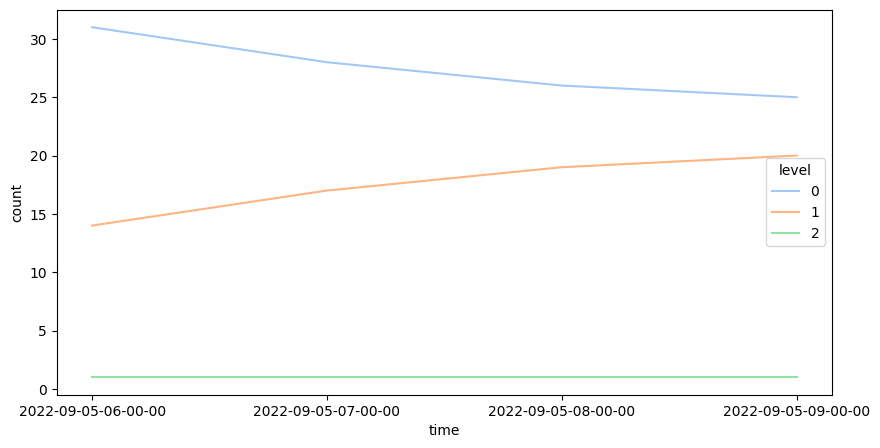

In [33]:
grouped_df = df.groupby(by=['time', 'level']).size().to_frame()
grouped_df.reset_index(inplace=True)
grouped_df['time'] = grouped_df['time'].dt.strftime('%Y-%m-%d %H-%M-%S')
grouped_df.rename(columns={0: "count"}, inplace=True)

plt.figure(figsize=(10,5))
sns.lineplot(x='time', y='count', data=grouped_df, hue='level', palette='pastel')
plt.show()

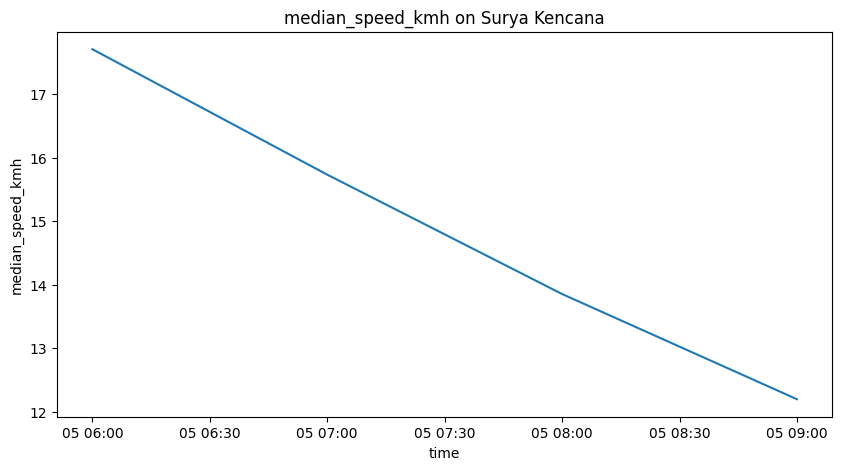

In [36]:
street = 'Surya Kencana'
feature = 'median_speed_kmh'

used_df = df[df['street'] == street]

plt.figure(figsize=(10,5))
plt.title('{} on {}'.format(feature, street))
sns.lineplot(x='time', y=feature, data=used_df)
plt.show()

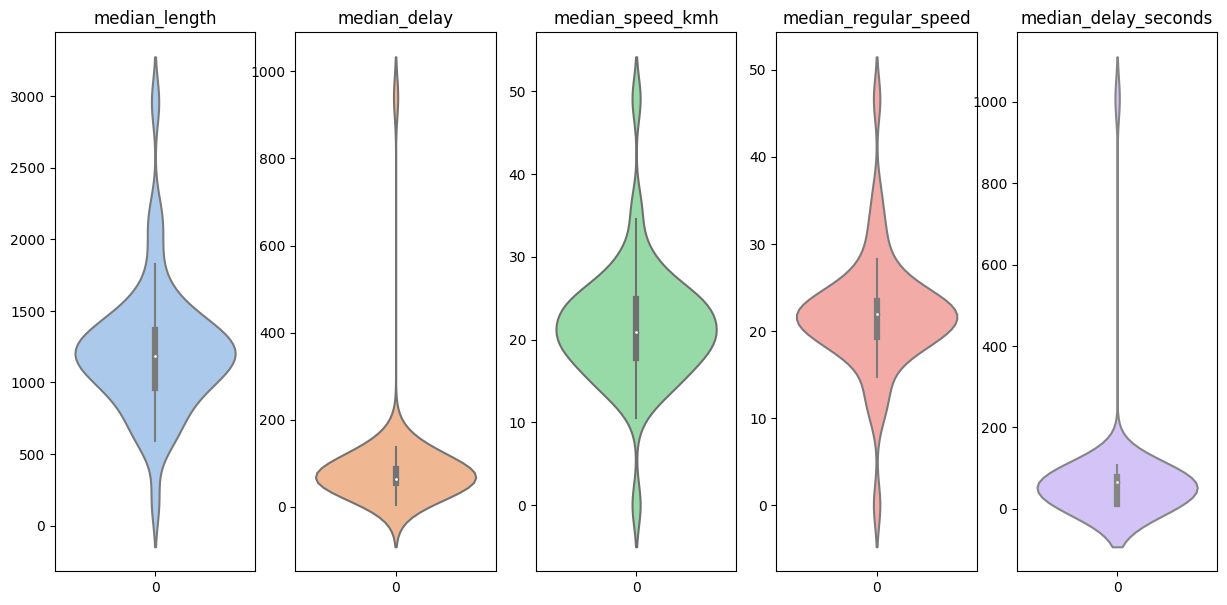

In [44]:
lst_feature = [
    'median_length', 
    'median_delay', 
    'median_speed_kmh', 
    'median_regular_speed', 
    'median_delay_seconds'
]

palette = sns.color_palette('pastel', len(lst_feature))
fig, axs = plt.subplots(1, len(lst_feature), figsize=(15, 7))

for i in range(len(lst_feature)):
    feature = lst_feature[i]
    sns.violinplot(df[feature], ax=axs[i], color=palette[i]).set_title(feature)

plt.show()

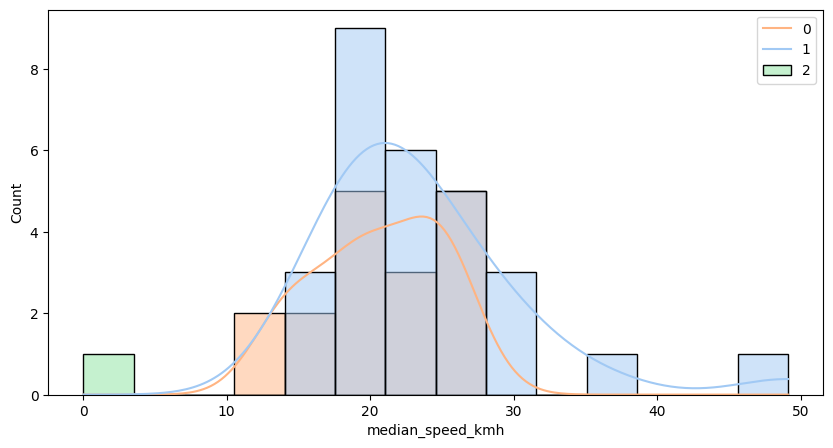

In [51]:
lst_level = list(set(df['level']))
timestamp = '2022-09-05 07:00:00'
feature = 'median_speed_kmh'

used_df = df[df['time'] == timestamp]

palette = sns.color_palette('pastel', len(lst_feature))

plt.figure(figsize=(10,5))
sns.histplot(x=feature, data=used_df, hue='level', palette='pastel', kde=True)
plt.legend(lst_level)
plt.show()